# 精度分析以外の分析視点

## Titanicにはどのような人が乗船していたのか

In [41]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# チケットクラスごとの人数を確認する

train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
all_df = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)

# チケットクラスごとの人数を確認する
train_df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass'>

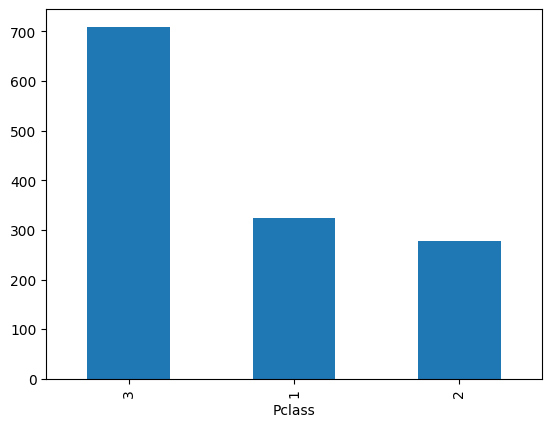

In [43]:
all_df.Pclass.value_counts().plot.bar()

# ３等級の乗客が他の等級の２倍以上多い

In [44]:
# 料金の分布を確認する

all_df[["Pclass", "Fare"]].groupby("Pclass").describe()

Fare                                                                 
        count       mean        std  min      25%      50%       75%       max
Pclass                                                                        
1       323.0  87.508992  80.447178  0.0  30.6958  60.0000  107.6625  512.3292
2       277.0  21.179196  13.607122  0.0  13.0000  15.0458   26.0000   73.5000
3       708.0  13.302889  11.494358  0.0   7.7500   8.0500   15.2458   69.5500

<Axes: xlabel='Pclass', ylabel='Fare'>

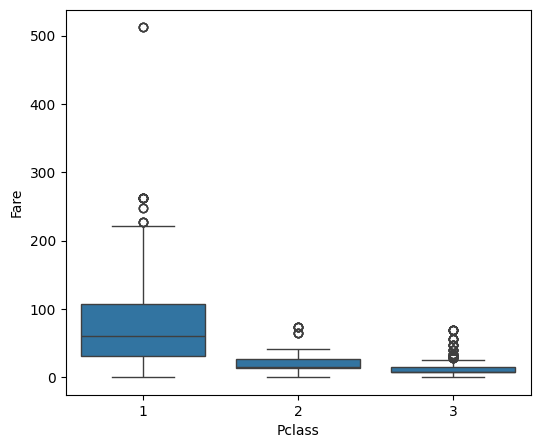

In [45]:
plt.figure(figsize=(6, 5))
sns.boxplot(x="Pclass", y="Fare", data=all_df)

# 3等級の７倍近い値段がするようです。

In [46]:
# １等級チケットのうち、高額チケット（１等級チケットの上位２５％）をPclass2にする

all_df["Pclass2"] = all_df["Pclass"]


In [47]:
all_df.loc[all_df["Fare"] > 108, "Pclass2"] = 0
all_df[all_df["Pclass2"] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass2
27,28,0.0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,0
31,32,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,0
88,89,1.0,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,0
118,119,0.0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,0
195,196,1.0,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,1263,NaN,1,"Wilson, Miss. Helen Alice",female,31.0,0,0,16966,134.5000,E39 E41,C,0
1266,1267,NaN,1,"Bowen, Miss. Grace Scott",female,45.0,0,0,PC 17608,262.3750,NaN,C,0
1291,1292,NaN,1,"Bonnell, Miss. Caroline",female,30.0,0,0,36928,164.8667,C7,S,0
1298,1299,NaN,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C,0


In [48]:
# チケットクラスごとの年齢の分布を確認する

all_df[["Pclass2", "Age"]].groupby("Pclass2").describe()

Age                                                     
         count       mean        std   min   25%   50%    75%   max
Pclass2                                                            
0         76.0  35.242368  15.422162  0.92  24.0  35.0  45.50  67.0
1        208.0  40.591346  13.981486  4.00  30.0  40.5  50.25  80.0
2        261.0  29.506705  13.638627  0.67  22.0  29.0  36.00  70.0
3        501.0  24.816367  11.958202  0.17  18.0  24.0  32.00  74.0

<Axes: xlabel='Pclass2', ylabel='Age'>

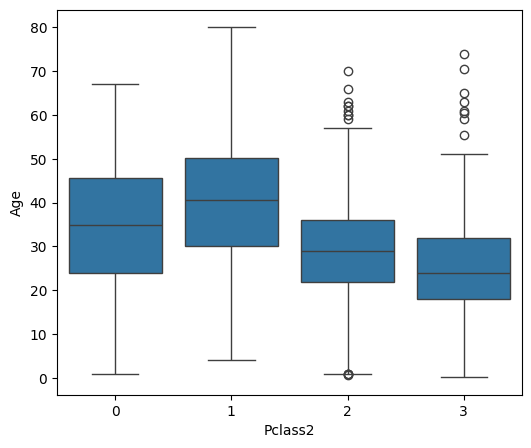

In [49]:
plt.figure(figsize=(6, 5))
sns.boxplot(x="Pclass2", y="Age", data=all_df)

# 平均年齢は３級から１級になるにつれて高くなる

In [50]:
# 15歳より上の人に限定して再度確認する

all_df[all_df["Age"] > 15][["Pclass2", "Age"]].groupby("Pclass2").describe()

Age                                                    
         count       mean        std   min   25%   50%   75%   max
Pclass2                                                           
0         69.0  37.920290  13.428357  17.0  27.0  36.0  48.0  67.0
1        207.0  40.768116  13.780416  16.0  30.0  41.0  50.5  80.0
2        233.0  32.369099  11.363367  16.0  24.0  30.0  39.0  70.0
3        422.0  28.200237   9.634512  16.0  21.0  26.0  33.0  74.0

<Axes: xlabel='Pclass2', ylabel='Age'>

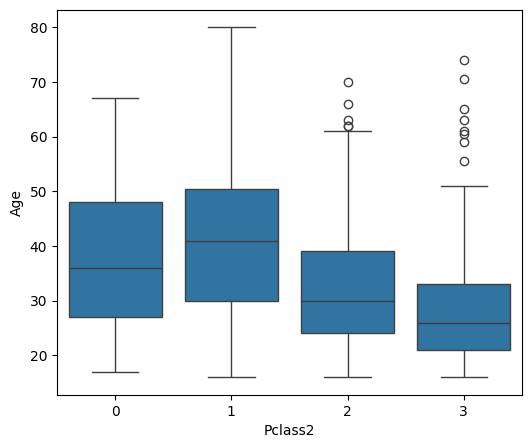

In [51]:
plt.figure(figsize=(6, 5))
sns.boxplot(x="Pclass2", y="Age", data=all_df[all_df["Age"] > 15])

<Axes: xlabel='Age', ylabel='Fare'>

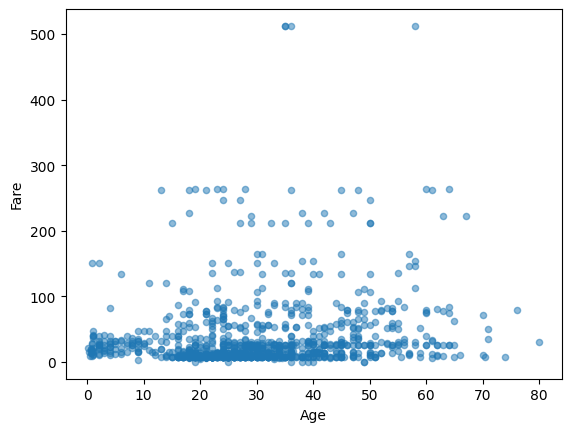

In [52]:
# 年齢と乗船料金の分布を確認する

all_df.plot.scatter(x="Age", y="Fare", alpha=0.5)

In [53]:
# チケットクラスごとの乗船家族人数を確認する

all_df["family_num"] = all_df["SibSp"] + all_df["Parch"]
all_df[["Pclass2", "family_num"]].groupby("Pclass2").describe()

family_num                                              
             count      mean       std  min  25%  50%  75%   max
Pclass2                                                         
0             81.0  1.543210  1.541504  0.0  0.0  1.0  2.0   5.0
1            242.0  0.553719  0.687172  0.0  0.0  0.0  1.0   3.0
2            277.0  0.761733  1.029060  0.0  0.0  0.0  1.0   5.0
3            709.0  0.968970  1.921230  0.0  0.0  0.0  1.0  10.0

<Axes: xlabel='Pclass2', ylabel='family_num'>

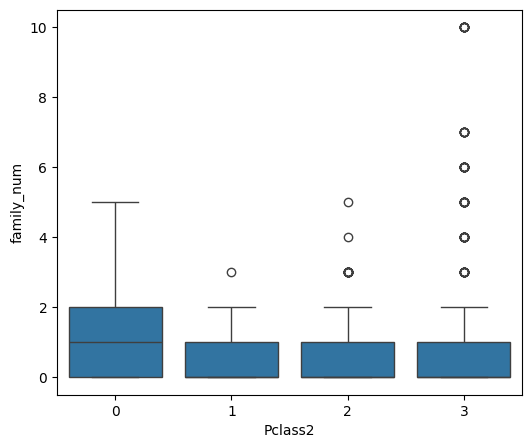

In [54]:
plt.figure(figsize=(6, 5))
sns.boxplot(x="Pclass2", y="family_num", data=all_df)

# 1~3は1を下回る
#0 は平均１.５、基本的に誰かと一緒
# ただし、家族が多いパターンは等級が下がるにつれて増える

<Axes: xlabel='Pclass2'>

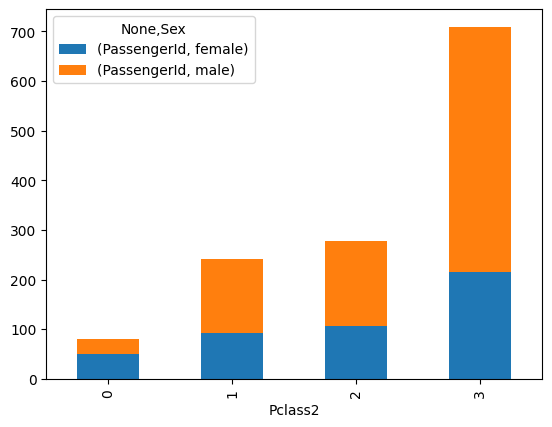

In [55]:
# チケットクラスごとの男女比について確認する

Pclass_gender_df = all_df[["Pclass2", "Sex", "PassengerId"]].dropna().groupby(["Pclass2", "Sex"]).count().unstack()
Pclass_gender_df.plot.bar(stacked=True)

In [56]:
Pclass_gender_df["male_ratio"] = Pclass_gender_df["PassengerId", "male"] / (Pclass_gender_df["PassengerId", "male"] + Pclass_gender_df["PassengerId", "female"])

Pclass_gender_df

PassengerId      male_ratio
Sex          female male           
Pclass2                            
0                51   30   0.370370
1                93  149   0.615702
2               106  171   0.617329
3               216  493   0.695346

<Axes: xlabel='Pclass2'>

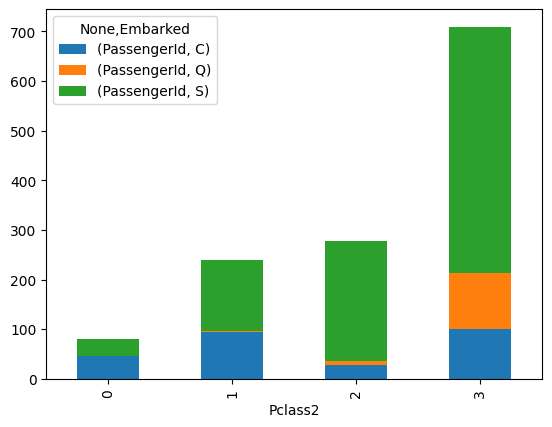

In [57]:
# 港ごとの違いを確認する

Pclass_emb_df = all_df[["Pclass2", "Embarked", "PassengerId"]].dropna().groupby(["Pclass2", "Embarked"]).count().unstack()
Pclass_emb_df = Pclass_emb_df.fillna(0)

Pclass_emb_df.plot.bar(stacked=True)    

In [58]:
Pclass_emb_df_ratio = Pclass_emb_df.copy()
Pclass_emb_df_ratio["sum"] = Pclass_emb_df_ratio["PassengerId","C"] + Pclass_emb_df_ratio["PassengerId","Q"] + Pclass_emb_df_ratio["PassengerId","S"]
Pclass_emb_df_ratio["PassengerId","C"] = Pclass_emb_df_ratio["PassengerId","C"] / Pclass_emb_df_ratio["sum"]
Pclass_emb_df_ratio["PassengerId","Q"] = Pclass_emb_df_ratio["PassengerId","Q"] / Pclass_emb_df_ratio["sum"]
Pclass_emb_df_ratio["PassengerId","S"] = Pclass_emb_df_ratio["PassengerId","S"] / Pclass_emb_df_ratio["sum"]
Pclass_emb_df_ratio = Pclass_emb_df_ratio.drop(["sum"],axis=1)

Pclass_emb_df_ratio

PassengerId                    
Embarked           C         Q         S
Pclass2                                 
0           0.580247  0.000000  0.419753
1           0.391667  0.012500  0.595833
2           0.101083  0.025271  0.873646
3           0.142454  0.159379  0.698166

<Axes: xlabel='Pclass2'>

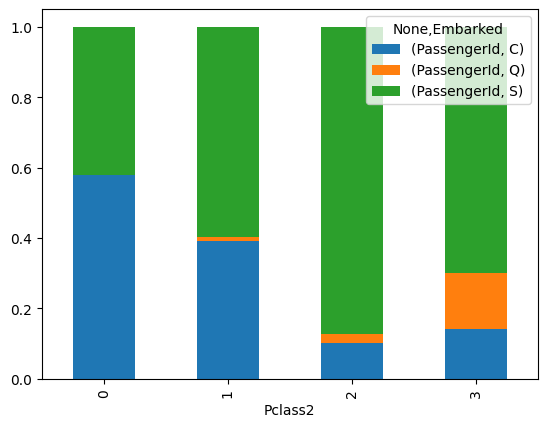

In [59]:
Pclass_emb_df_ratio.plot.bar(stacked=True)

- 0等級: 同伴者連れが多く、男女比率が他のチケットクラスよりも低い。年齢層がやや高め。Cherbourgで乗船している人が多い。
- 1等級:  他のクラスと比較して最も年齢層が高い。一人での乗船率が最も高く、大家族の乗船はない。
- 2等級: １等級と３等級の間の傾向。Southamptonで乗船する比率が最も高い。
- 3等級: 一人から大家族までサマざな人数での乗船がある。他のクラスよりもQueenstownで乗船する割合が高い。

### 追加分析❷：特定のクラスタに注目してみる

In [64]:
C_young10 = all_df[(all_df["Embarked"] == "C") & (all_df["Age"] // 10 == 1) & (all_df["family_num"] == 0)]

In [65]:
C_young20 = all_df[(all_df["Embarked"] == "C") & (all_df["Age"] // 10 == 2) & (all_df["family_num"] == 0)]

In [66]:
len(C_young10)

7

In [67]:
len(C_young20)

31

In [68]:
# 「Cherbourgからの1人乗船の若者」というクラスタの特徴を分析

<Axes: xlabel='Age', ylabel='Fare'>

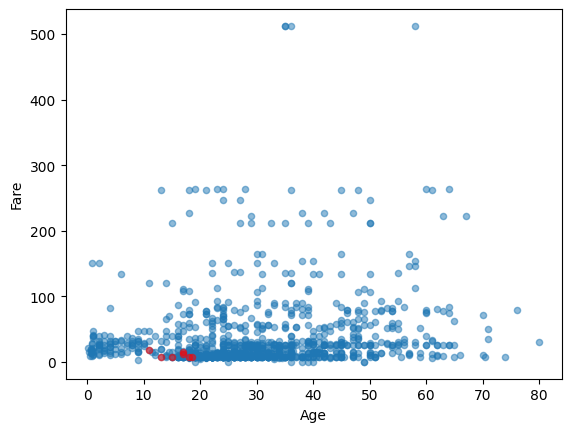

In [70]:
ax = all_df.plot.scatter(x="Age", y="Fare", alpha=0.5)
C_young10.plot.scatter(x="Age", y="Fare", color="red",alpha=0.5, ax=ax)

<Axes: xlabel='Age', ylabel='Fare'>

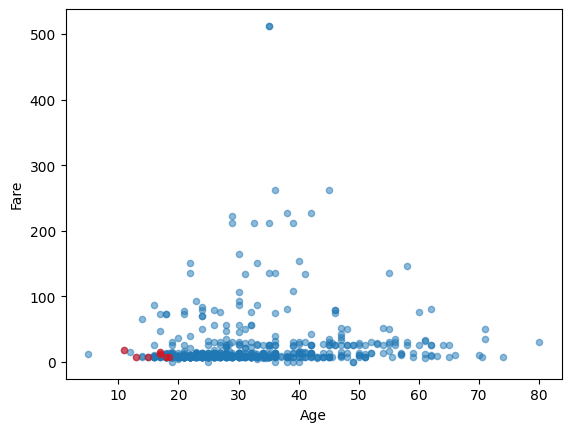

In [ ]:
# 1人乗船の人に限った中での「Cherbourgからの1人乗船の若者（10代）」を確認
ax = all_df[all_df["family_num"] == 0].plot.scatter(x="Age", y="Fare", alpha=0.5)
C_young10.plot.scatter(x="Age", y="Fare", color="red",alpha=0.5, ax=ax)

<Axes: xlabel='Age', ylabel='Fare'>

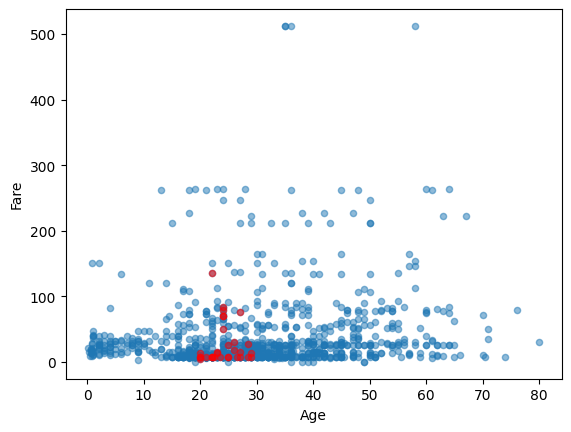

In [72]:
# 「Cherbourgからの1人乗船した20代」についても同様に確認

ax = all_df.plot.scatter(x="Age", y="Fare", alpha=0.5)
C_young20.plot.scatter(x="Age", y="Fare", color="red",alpha=0.5, ax=ax)

<Axes: xlabel='Age', ylabel='Fare'>

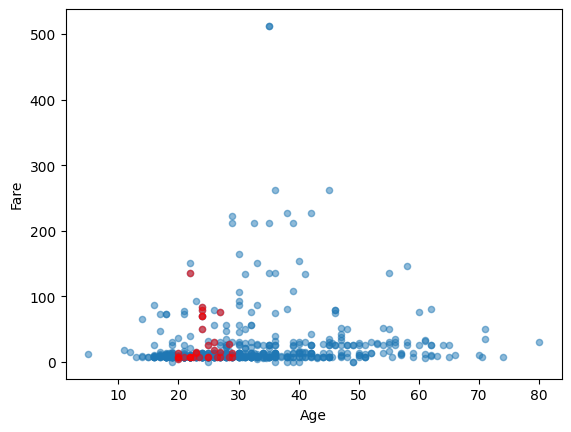

In [73]:
ax = all_df[all_df["family_num"] == 0].plot.scatter(x="Age", y="Fare", alpha=0.5)
C_young20.plot.scatter(x="Age", y="Fare", color="red",alpha=0.5, ax=ax)

<Axes: xlabel='Age', ylabel='Fare'>

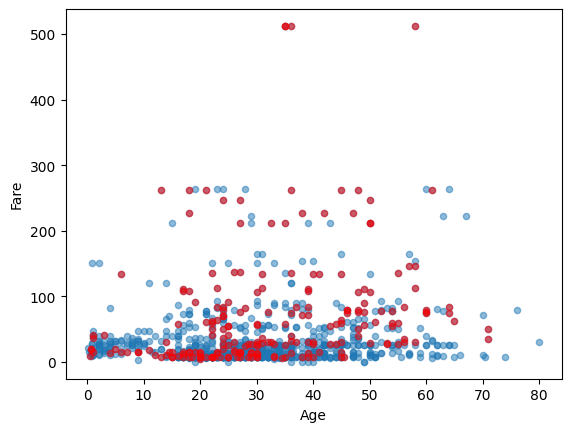

In [74]:
# Cherbourgからの乗船客を全体の中で表示する

C_all = all_df[(all_df["Embarked"] == "C")]
ax = all_df.plot.scatter(x="Age", y="Fare", alpha=0.5)
C_all.plot.scatter(x="Age", y="Fare", color="red",alpha=0.5, ax=ax)

各乗船港ごとに10代1人乗船客の平均料金を比較する

In [75]:
all_df[(all_df["Age"] // 10 == 1) & (all_df["family_num"]== 0)][["Embarked","Fare"]].groupby("Embarked").mean()

,Fare
Embarked,
C,10.594057
Q,7.531944
S,16.218712
